# Project Task 1 : Data Exploration and Processing
#### Gruppe: B (Josef Weibel / Rebecka Fahrni)

In [149]:
from datasets import load_dataset
data = load_dataset('argilla/medical-domain')['train']
df = data.to_pandas()

# add label and text length 
df['label'] = df.prediction.apply(lambda x: x[0]['label'])
df['text_length'] = df.metrics.apply(lambda x: x['text_length'])
df.head()



,text,inputs,prediction,prediction_agent,annotation,annotation_agent,multi_label,explanation,id,metadata,status,event_timestamp,metrics,label,text_length
0,"PREOPERATIVE DIAGNOSIS:, Iron deficiency anemia.,POSTOPERATIVE DIAGNOSIS:, Diverticulosis.,PROCEDURE:, Colonoscopy.,MEDICATIONS: , MAC.,PROCEDURE: , The Olympus pediatric variable colonoscope was introduced into the rectum and advanced carefully through the colon to the cecum identified by the ileocecal valve and the appendiceal orifice. Preparation was good, although there was some residual material in the cecum that was difficult to clear completely. The mucosa was normal throughout the colon. No polyps or other lesions were identified, and no blood was noted. Some diverticula were seen of the sigmoid colon with no luminal narrowing or evidence of inflammation. A retroflex view of the anorectal junction showed no hemorrhoids. The patient tolerated the procedure well and was sent to the recovery room.,FINAL DIAGNOSES:,1. Diverticulosis in the sigmoid.,2. Otherwise normal colonoscopy to the cecum.,RECOMMENDATIONS:,1. Follow up with Dr. X as needed.,2. Screening colonoscopy in 2 years.,3. Additional evaluation for other causes of anemia may be appropriate.","{'text': 'PREOPERATIVE DIAGNOSIS:, Iron deficiency anemia.,POSTOPERATIVE DIAGNOSIS:, Diverticulosis.,PROCEDURE:, Colonoscopy.,MEDICATIONS: , MAC.,PROCEDURE: , The Olympus pediatric variable colonoscope was introduced into the rectum and advanced carefully through the colon to the cecum identified by the ileocecal valve and the appendiceal orifice. Preparation was good, although there was some residual material in the cecum that was difficult to clear completely. The mucosa was normal throughout the colon. No polyps or other lesions were identified, and no blood was noted. Some diverticula were seen of the sigmoid colon with no luminal narrowing or evidence of inflammation. A retroflex view of the anorectal junction showed no hemorrhoids. The patient tolerated the procedure well and was sent to the recovery room.,FINAL DIAGNOSES:,1. Diverticulosis in the sigmoid.,2. Otherwise normal colonoscopy to the cecum.,RECOMMENDATIONS:,1. Follow up with Dr. X as needed.,2. Screening colonoscopy in 2 years.,3. Additional evaluation for other causes of anemia may be appropriate.'}","[{'label': ' Gastroenterology', 'score': 1.0}]",Argilla,None,None,False,None,00001265-03e2-47b2-b6cf-bed32dad2fa9,None,Default,2022-12-07 09:38:43.003878,{'text_length': 1085},Gastroenterology,1085
1,"CLINICAL INDICATION: ,Normal stress test.,PROCEDURES PERFORMED:,1. Left heart cath.,2. Selective coronary angiography.,3. LV gram.,4. Right femoral arteriogram.,5. Mynx closure device.,PROCEDURE IN DETAIL: , The patient was explained about all the risks, benefits, and alternatives of this procedure. The patient agreed to proceed and informed consent was signed.,Both groins were prepped and draped in the usual sterile fashion. After local anesthesia with 2% lidocaine, a 6-French sheath was inserted in the right femoral artery. Left and right coronary angiography was performed using 6-French JL4 and 6-French 3DRC catheters. Then, LV gram was performed using 6-French pigtail catheter. Post LV gram, LV-to-aortic gradient was obtained. Then, the right femoral arteriogram was performed. Then, the Mynx closure device was used for hemostasis. There were no complications.,HEMODYNAMICS: , LVEDP was 9. There was no LV-to-aortic gradient.,CORONARY ANGIOGRAPHY:,1. Left main is normal. It bifurcates into LAD and left circumflex.,2. Proximal LAD at the origin of big diagonal, there is 50% to 60% calcified lesion present. Rest of the LAD free of disease.,3. Left circumflex is a large vessel and with minor plaque.,4. Right coronary is dominant and also has proximal 40% stenosis.,SUMMARY:,1. Nonobstructive coronary artery disease, LAD proximal at the origin of big diagonal has 50% to 60% stenosis, which is calcified.,2. RCA has 40% proximal stenosis.,3. Normal LV systolic fun

## Exploration of datasets 

### calculating basic statistics 
- number of samples and number of samples per class: is  dataset balanced?
- min / avg / max length of text

In [150]:
import pandas as pd

# number of samples
total_samples = len(df)

# number of samples per class
samples_per_class = df['label'].value_counts() 

print(samples_per_class)
print('Total samples: ', total_samples)


label
 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry         

Based on the output of the `samples_per_class` variable, we can see that the dataset is not balanced. The number of samples per class varies greatly, with the highest number of samples belonging to the "Surgery" class (1088 samples) and the lowest number of samples belonging to the "Hospice - Palliative Care" class (6 samples). 

This imbalance in the dataset could potentially lead to biased model performance, as the model may be more likely to predict the majority class. Therefore, it may be necessary to balance the dataset by oversampling the minority classes or undersampling the majority class. 

Further analysis of the dataset could also be performed, such as examining the distribution of text lengths and the frequency of tokens in each class, to gain a better understanding of the data and inform preprocessing decisions.

Min length:  11
Avg length:  3052.314337494966
Max length:  18425


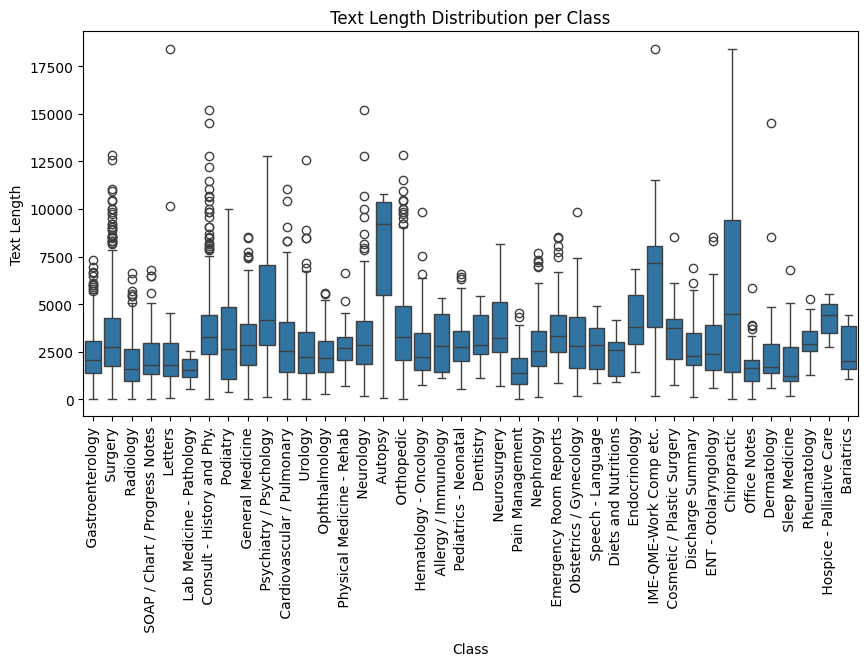

In [151]:
# Text lengths
lengths = df['text'].apply(len)
min_length = lengths.min()
avg_length = lengths.mean()
max_length = lengths.max()
print('Min length: ', min_length)
print('Avg length: ', avg_length)
print('Max length: ', max_length)

# Text lengths per class
lengths_per_class = df.groupby('label')['text'].apply(lambda x: x.str.len())
min_length_per_class = lengths_per_class.min()
avg_length_per_class = lengths_per_class.mean()
max_length_per_class = lengths_per_class.max()

# plot the text length distribution per class

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='label', y='text_length', data=df, ax=ax)
ax.set_title('Text Length Distribution per Class')
ax.set_xlabel('Class')
ax.set_ylabel('Text Length')
plt.xticks(rotation=90)
plt.show()


### Key Observations Min/avg/max text length and text lengths per class:

- There is a large variability Across Classes:  Some classes tend to have longer texts, such as "Gastroenterology" and "ENT," while others, like "Cardiovascular," have a more compact representation.

- Outliers: Several classes have outliers, evident from the individual data points situated above the upper whisker of the boxplots. Notably, classes like "Psychiatry" and "Emergency Medicine" have multiple outliers, suggesting a few instances where the text lengths substantially deviate from the typical lengths for those classes.

- Consistency in some Classes: Some have a tight distribution, suggesting a consistency in the text lengths. For instance, the "Physical Medicine" and "Urology" categories have boxplots with shorter heights, indicating that their text lengths don't vary significantly.

- Classes with extensive Lengths: "ENT" stands out with a particularly high median, and its interquartile range also leans towards the higher side. This suggests that texts under this class tend to be lengthier compared to others.

- Classes with short Texts: On the opposite end, classes like "Consult," "Pediatric Surgery," and "Special & Advanced Cosmetic Surgery" tend to have shorter texts on average, as indicated by their lower median values.

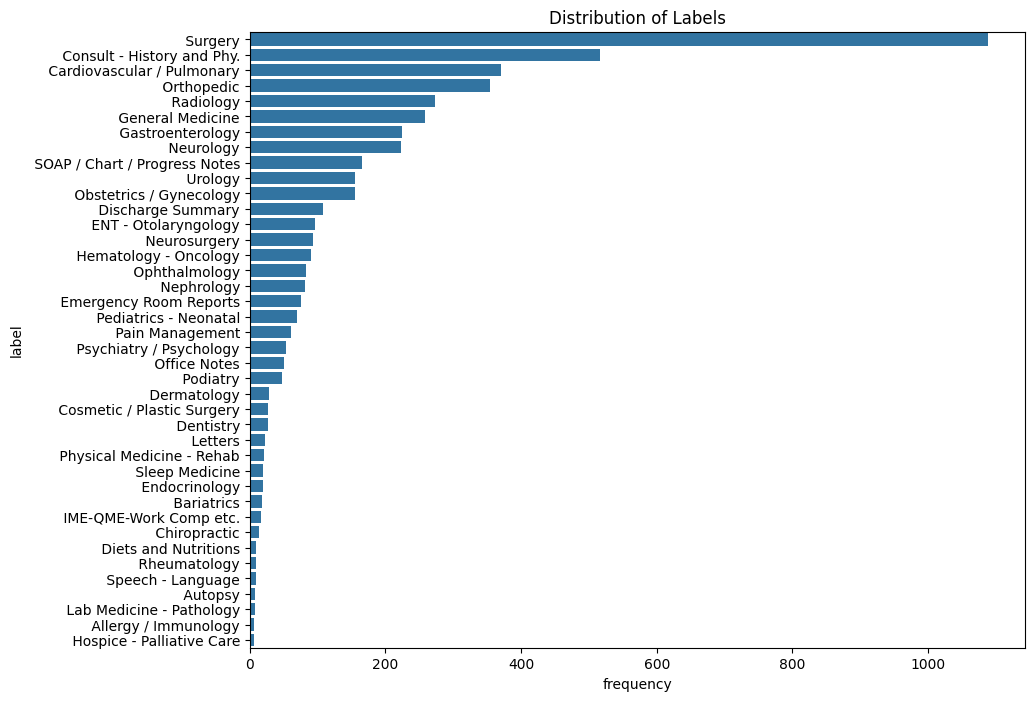

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# plot the label distribution
label_frequencies = df.label.value_counts()

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.barplot(
	x=label_frequencies.values,
	y=label_frequencies.index,
	ax=ax
)
ax.set_title('Distribution of Labels')
ax.set_xlabel('frequency')
ax.set_ylabel('label')
plt.show()

This shows how unbalanced the dataset is 

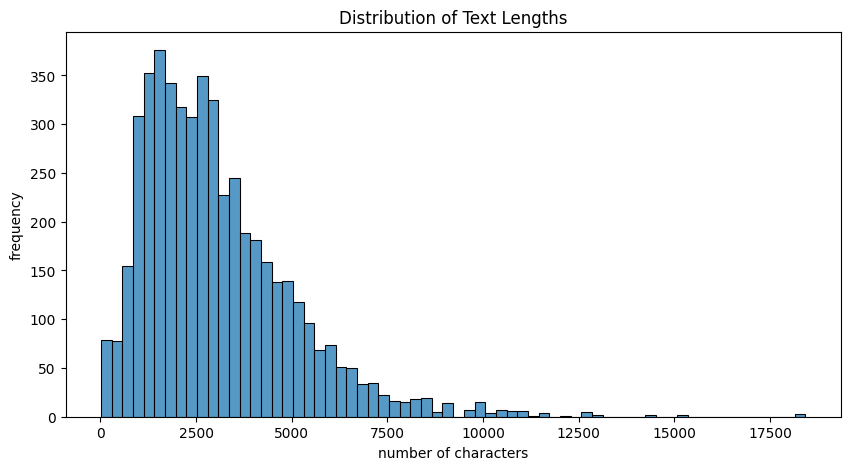

In [153]:
# plot the distribution of text lengths
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
sns.histplot(
	df.text_length,
	ax=ax
)
ax.set_title('Distribution of Text Lengths')
ax.set_xlabel('number of characters')
ax.set_ylabel('frequency')
plt.show()

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\694347159.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = df.groupby(['label', 'text_length_bin']).size().unstack().fillna(0)


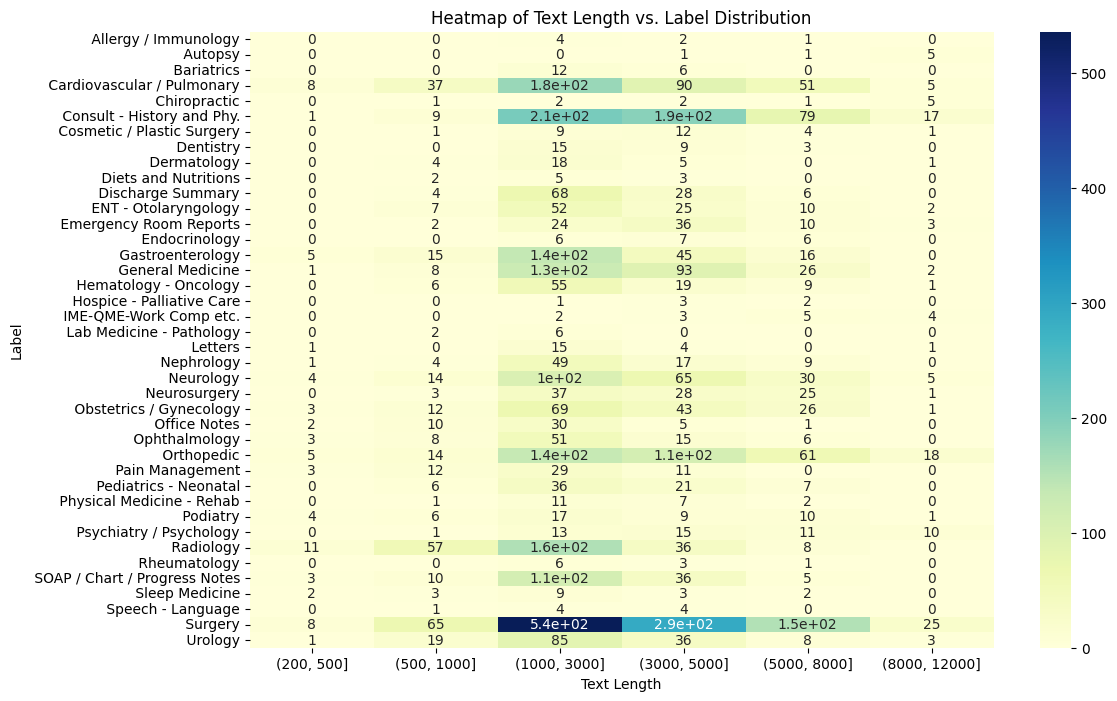

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming your dataframe is named df and has a 'text' column containing the texts
df['text_length'] = df['text'].apply(len)

# Bin text lengths into buckets
bins = [200, 500, 1000, 3000, 5000, 8000, 12000]  # You can customize these bins as per your needs
df['text_length_bin'] = pd.cut(df['text_length'], bins=bins)

pivot_table = df.groupby(['label', 'text_length_bin']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Text Length vs. Label Distribution')
plt.xlabel('Text Length')
plt.ylabel('Label')
plt.show()


Most texts are in the range 1000-3000

### determining the national language(s) used

In [155]:
# !pip install langdetect
from langdetect import detect

df['language'] = df['text'].apply(lambda x: detect(x))
unique_languages = df['language'].unique()

# create a dictionary text samples : language
language_counts = {}
for lang in unique_languages:
    count = len(df[df['language'] == lang])
    language_counts[lang] = count
print(language_counts)


{'en': 4953, 'so': 2, 'pt': 3, 'de': 2, 'nl': 2, 'tl': 2, 'ro': 2}


The majority of samples are english texts 

### Reading through 100+ samples

In [156]:
samples = df.sample(100)['text']
for sample in samples:
    print(sample)

PROBLEM LIST:,1.  HIV stable.,2.  Hepatitis C chronic.,3.  History of depression, stable off meds.,4.  Hypertension, moderately controlled.,CHIEF COMPLAINT: , The patient comes for a routine followup appointment.,HISTORY OF PRESENTING ILLNESS: , This is a 34-year-old African American female who comes today for routine followup.  She has no acute complaints.  She reports that she has a muscle sprain on her upper back from lifting.  The patient is a housekeeper by profession.  It does not impede her work in anyway.  She just reports that it gives her some trouble sleeping at night, pain on 1 to 10 scale was about 2 and at worse it is 3 to 4 but relieved with over-the-counter medication.  No other associated complaints.  No neurological deficits or other specific problems.  The patient denies any symptoms associated with opportunistic infection.,PAST MEDICAL HISTORY:,1.  Significant for HIV.,2.  Hepatitis.,3.  Depression.,4.  Hypertension.,CURRENT MEDICATIONS:,1.  She is on Trizivir 1 tab

-  Style and Structure:
    * Clinical and Detailed: The texts follow a typical clinical documentation format, detailing both subjective complaints and objective findings. They delineate the assessment and subsequent plans, maintaining clarity and specificity. Example: "She feels as though she may have some allergies at night. Most of her symptoms occur then, not during the day." describes a patient's symptoms in a straightforward, clinical manner. 

    * Segmented: Each narrative is divided into various segments, which can range from 'Objective' to 'Impression.' Each segment has its own set of specifics, aiding in clarity and organization.
Example: Under the heading "REVIEW OF SYSTEMS:", various body systems are listed with associated findings or symptoms.

-  Vocabulary:
     * Medical Terminology: such as "rhinorrhea," "thyromegaly," "otoscopy," "Rinne test," and "arthroplasty." but also clinical descriptions with sentences like like "well-developed, well-nourished," and "in no distress" are standard clinical descriptors.

- Spelling:
    *   Most terms are correctly spelled, but a careful proofreading can ensure the absence of typos. For instance, "mammogram which was normal recently" may benefit from a more grammatically sound structure.

- Noteworthy Characteristics:

    *  Acronyms: The text often resorts to acronyms like "HEENT," "GI," and "GU" to denote various systems of the body - common in medical narratives to provide concise information.

    * Punctuation: The use of commas and periods is consistent, especially to list symptoms or clinical findings.

    *  Measurements: The text uses exact measurements where necessary, like "2 cm in length" or "24 mg dose bid."

    * Clinical Tests and Examinations:  frequently includes specific clinical tests (e.g., "DIX-HALLPIKE" or "FRENZEL GLASSES EXAMINATION") and their outcomes for a comprehensive overview of the patient's health.

    * Recommendations and Follow-ups: Each narrative concludes with specific recommendations or plans for the patient, based on the assessments made.



Some sentences can be revised for better coherence and grammar. For instance, "She had a mammogram which was normal recently" could be changed to "She recently had a mammogram, which was normal." Uniformity in atient descriptions would also be needed, some descriptions provide the ethnicity and gender of the patient ( "77-year-old Hispanic male"), others do not. Ensuring uniformity across narratives can help in consistent data representation.

In [157]:
# Find headers in a given text
import re
from nltk.tokenize import sent_tokenize

def find_headers(text):
    """Find headers in a given text"""
    potential_headers = re.findall(r'([A-Z\s]+:)', text)
    # in uppercase and end with colon
    return [header for header in potential_headers if header.isupper()]



df['headers'] = df['text'].apply(find_headers)

unique_headers_set = set()
df['headers'].apply(unique_headers_set.update)
unique_headers_list = list(unique_headers_set)

print(unique_headers_list)


['BRIEF HISTORY:', 'PRIMARY OPERATIVE PROCEDURE:', 'HISTORY OF PRESENTING PROBLEM:', 'CORONARY ANATOMY:', 'PRESENTATION HISTORY:', 'CONDITION ON TRANSFER:', '  GI:', 'CRYSTALLOIDS:', 'PANCREAS:', 'HEMATOLOGICAL:', ' RCA:', 'BRADY PARAMETER SETTINGS ARE AS FOLLOWS:', 'IMMUNOHISTOCHEMICAL STUDIES:', 'NERVE CONDUCTION STUDIES:', 'HEMATOLOGIC AND LYMPHATIC:', 'IMAGING STUDIES:', 'MATERIALS USED:', '  AXIS I:', '  CONSTITUTIONAL:', 'BREATHING:', 'VEHICULAR TRAUMA HISTORY:', 'EKG:', ' SENSORY:', 'PSYCHE:', 'PREOP DX:', 'REST:', 'DETAILS:', 'FL:', 'ESTIMATED FETAL WEIGHT PERCENTILE:', 'SURGERY:', 'EMERGENCY ROOM COURSE:', 'DISCHARGE FOLLOWUP:', ' INDICATIONS:', 'TREATMENT HISTORY:', 'MEDICAL RECORD REVIEW:', 'GENITAL:', 'THORACIC SPINE:', 'GI:', 'URINE OUTPUT:', 'HISTORY OF OCCUPATIONAL INJURY OR ILLNESS:', 'ECHOCARDIOGRAPHIC DIAGNOSES:', 'PATIENT GOALS:', 'CARDIAC RISKS:', 'LABORATORY AND DIAGNOSTIC DATA:', 'INSIGHT:', 'INTERIM HISTORY:', 'HIGHEST LEVEL OF EDUCATION:', 'IMPLANT USED FOR PROC

## A structured and flexible (configurable) processing pipeline

In [158]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re

class TextProcessingPipeline:

    language_mapping = {
        'en': 'english',
        'pt': 'portuguese',
        'de': 'german',
        'nl': 'dutch'
    }
    
    def __init__(self, language='en', tokenizer_type='word', stemmer_type='snowball', use_stemming=True, use_lemmatization=False, use_special_header=False):
        self.language = self.language_mapping.get(language, language)
        self.tokenizer = self._choose_tokenizer(tokenizer_type)
        self.stemmer = self._choose_stemmer(stemmer_type)
        self.lemmatizer = WordNetLemmatizer() if use_lemmatization and self.language == 'english' else None
        self.use_stemming = use_stemming
        self.use_special_header = use_special_header
        self.stop_words = set(stopwords.words(self.language))
    
    def _handle_special_headers(self, text):
        headers = unique_headers_list
        segments = {}
        for i, header in enumerate(headers):
            if header.lower() in text:
                start_idx = text.find(header.lower())
                end_idx = text.find(headers[i + 1].lower()) if i + 1 < len(headers) and headers[i + 1].lower() in text else None
                segments[header[:-1]] = text[start_idx + len(header):end_idx].strip() if end_idx else text[start_idx + len(header):].strip()
                
        return segments

    def _choose_tokenizer(self, tokenizer_type):
        if tokenizer_type == 'word':
            return word_tokenize
        elif tokenizer_type == 'sentence':
            return sent_tokenize
        elif tokenizer_type == 'regex':
            tokenizer = RegexpTokenizer(r'\w+')
            return tokenizer.tokenize
        else:
            raise ValueError('Invalid tokenizer type.')

    def _choose_stemmer(self, stemmer_type):
        if self.language not in ['english', 'portuguese', 'german', 'dutch']:
            raise ValueError('Stemming support is limited to English, Portuguese, German, and Dutch.')
        if stemmer_type == 'snowball':
            return SnowballStemmer(language=self.language)
        else:
            raise ValueError('Invalid stemmer type.')

    def process(self, text):
        # Special headers

        if self.use_special_header:
            segments = self._handle_special_headers(text.lower())
            for header, content in segments.items():
                tokens = self.tokenizer(content)
                tokens = [token for token in tokens if token not in [',', '.', ':']]

                # normlaization
                if self.lemmatizer:
                    tokens = [self.lemmatizer.lemmatize(token.lower()) for token in tokens]
                elif self.use_stemming:
                    tokens = [self.stemmer.stem(token.lower()) for token in tokens]
                else:
                    tokens = [token.lower() for token in tokens]

                tokens = [token for token in tokens if token not in self.stop_words]
                
                segments[header] = tokens
            return segments

        # Tokenization
        tokens = self.tokenizer(text)

        # Remove unwanted tokens such as single punctuation, etc.
        tokens = [token for token in tokens if token not in [',', '.', ':','(',')','#','?','2','1','dr.']]
        
        
        # Normalization: lowercase, stemming/lemmatization
        if self.lemmatizer:
            tokens = [self.lemmatizer.lemmatize(token.lower()) for token in tokens]
        elif self.use_stemming:
            tokens = [self.stemmer.stem(token.lower()) for token in tokens]
        else:
            tokens = [token.lower() for token in tokens]
        
        # Token filtering: remove stop words
        tokens = [token for token in tokens if token not in self.stop_words]
        
        return tokens


#### Text processing pipeline for English texts 
- NLTK Word tokenizer and Snowball stemmer and special headers handling (no lemmaitzation)
- Be aware letting it run takes several minutes = up to 7min

In [159]:
# Text processing pipeline for English texts using word tokenizer and Snowball stemmer and special headers handling

english_texts = df[df['language'] == 'en']
pipeline = TextProcessingPipeline(language='en', tokenizer_type='word', stemmer_type='snowball', use_lemmatization=False, use_special_header=True)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)

# original text vs processed text
print(english_texts[['text', 'processed_text']].head())

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\3530007824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


- NLTK Sentence tokenizer and Snowball stemmer and No special headers handling and No lemmaitzation
- takes up to 6s

In [160]:
pipeline = TextProcessingPipeline(language='en', tokenizer_type='sentence', stemmer_type='snowball', use_lemmatization=False, use_special_header=False)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


print(english_texts[['processed_text']].head())

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\4281618194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


- NLTK Regex tokenizer and Snowball stemmer and No special headers handling and No lemmaitzation
- takes up to 22s

In [161]:
pipeline = TextProcessingPipeline(language='en', tokenizer_type='regex', stemmer_type='snowball', use_lemmatization=False, use_special_header=False)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


print(english_texts[['processed_text']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          processed_text
0                                                         [preoper, diagnosi, iron, defici, anemia, postop, diagnosi, diverticulosi, procedur, colonoscopi, medic, mac, procedur, olympus, pedi

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\3935858733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


- NLTK Word tokenizer and No stemmer and No special headers handling - but lemmaitzation
- takes up to 22s

In [162]:
pipeline = TextProcessingPipeline(language='en', tokenizer_type='word',use_stemming=False, use_lemmatization=True, use_special_header=False)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


print(english_texts[['processed_text']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        processed_text
0  [preoperative, diagnosis, iron, deficiency, anemia., postoperative, diagnosis,

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1608101184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


## Calculate TFDs for different variants of the processing pipeline

Using pipeline variant #1


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(variant.process)
C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


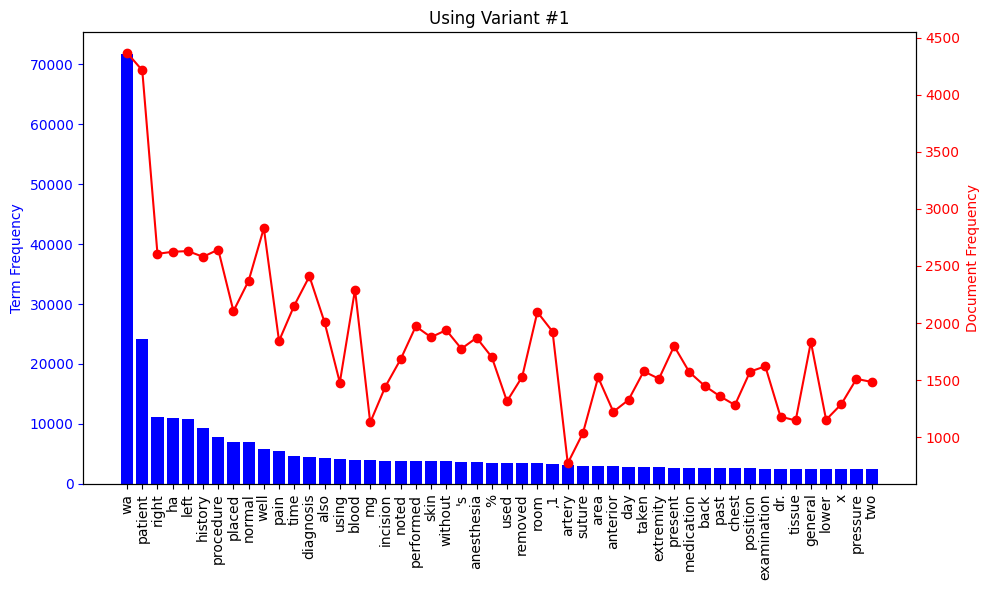


--------------------------------------------------

Using pipeline variant #2


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


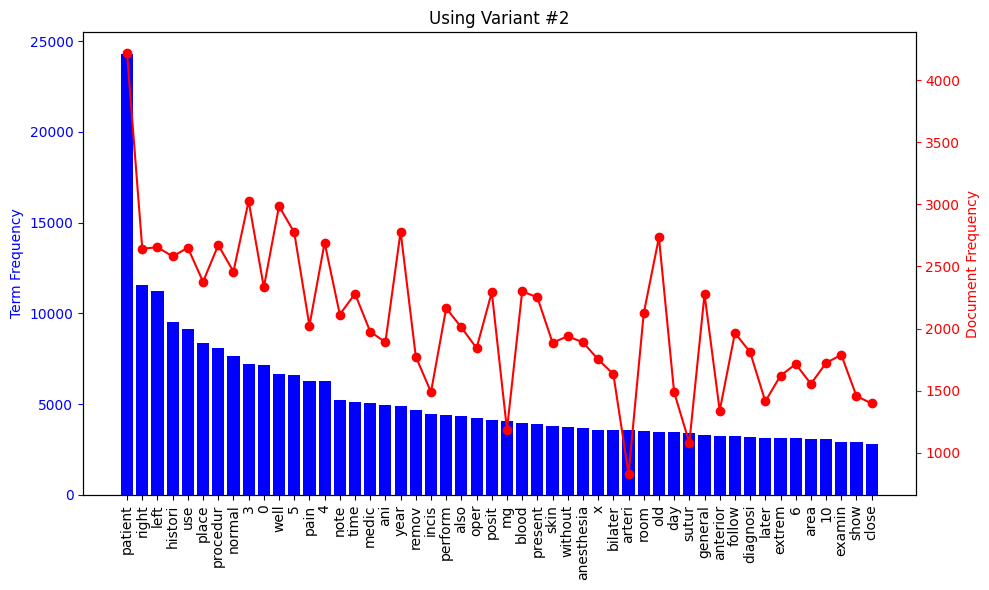


--------------------------------------------------

Using pipeline variant #3


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


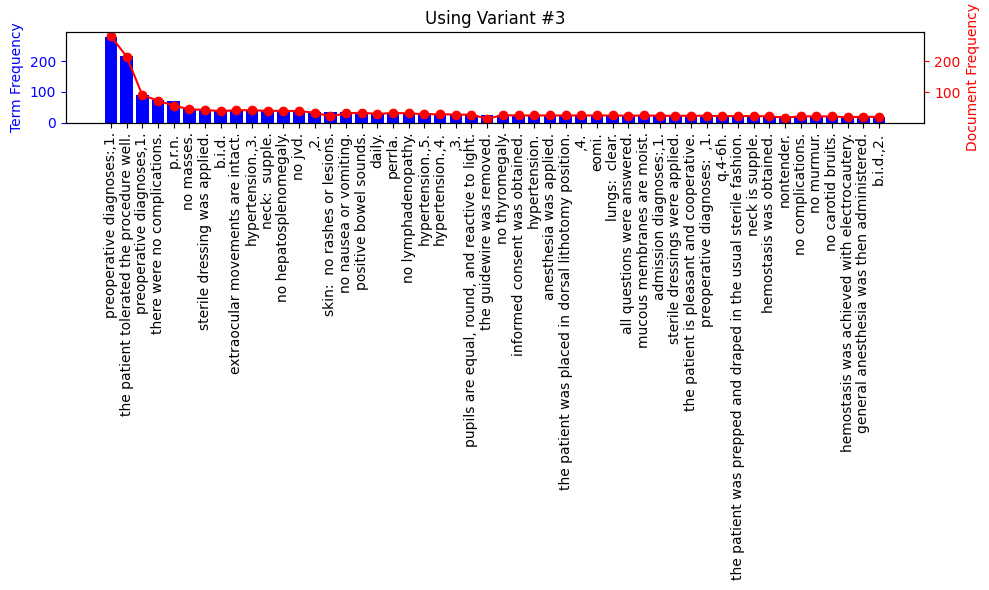


--------------------------------------------------

Using pipeline variant #4


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


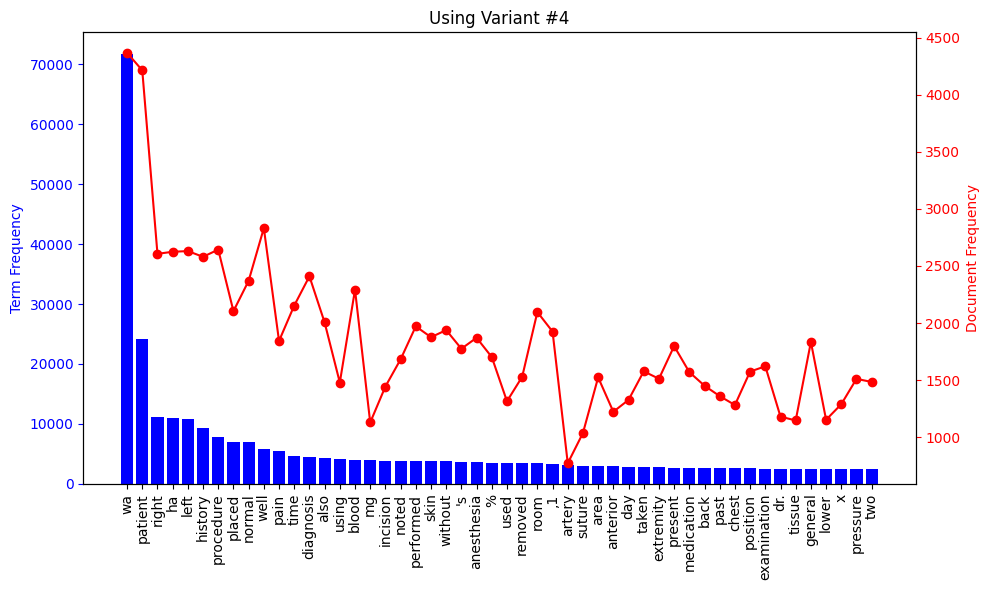


--------------------------------------------------



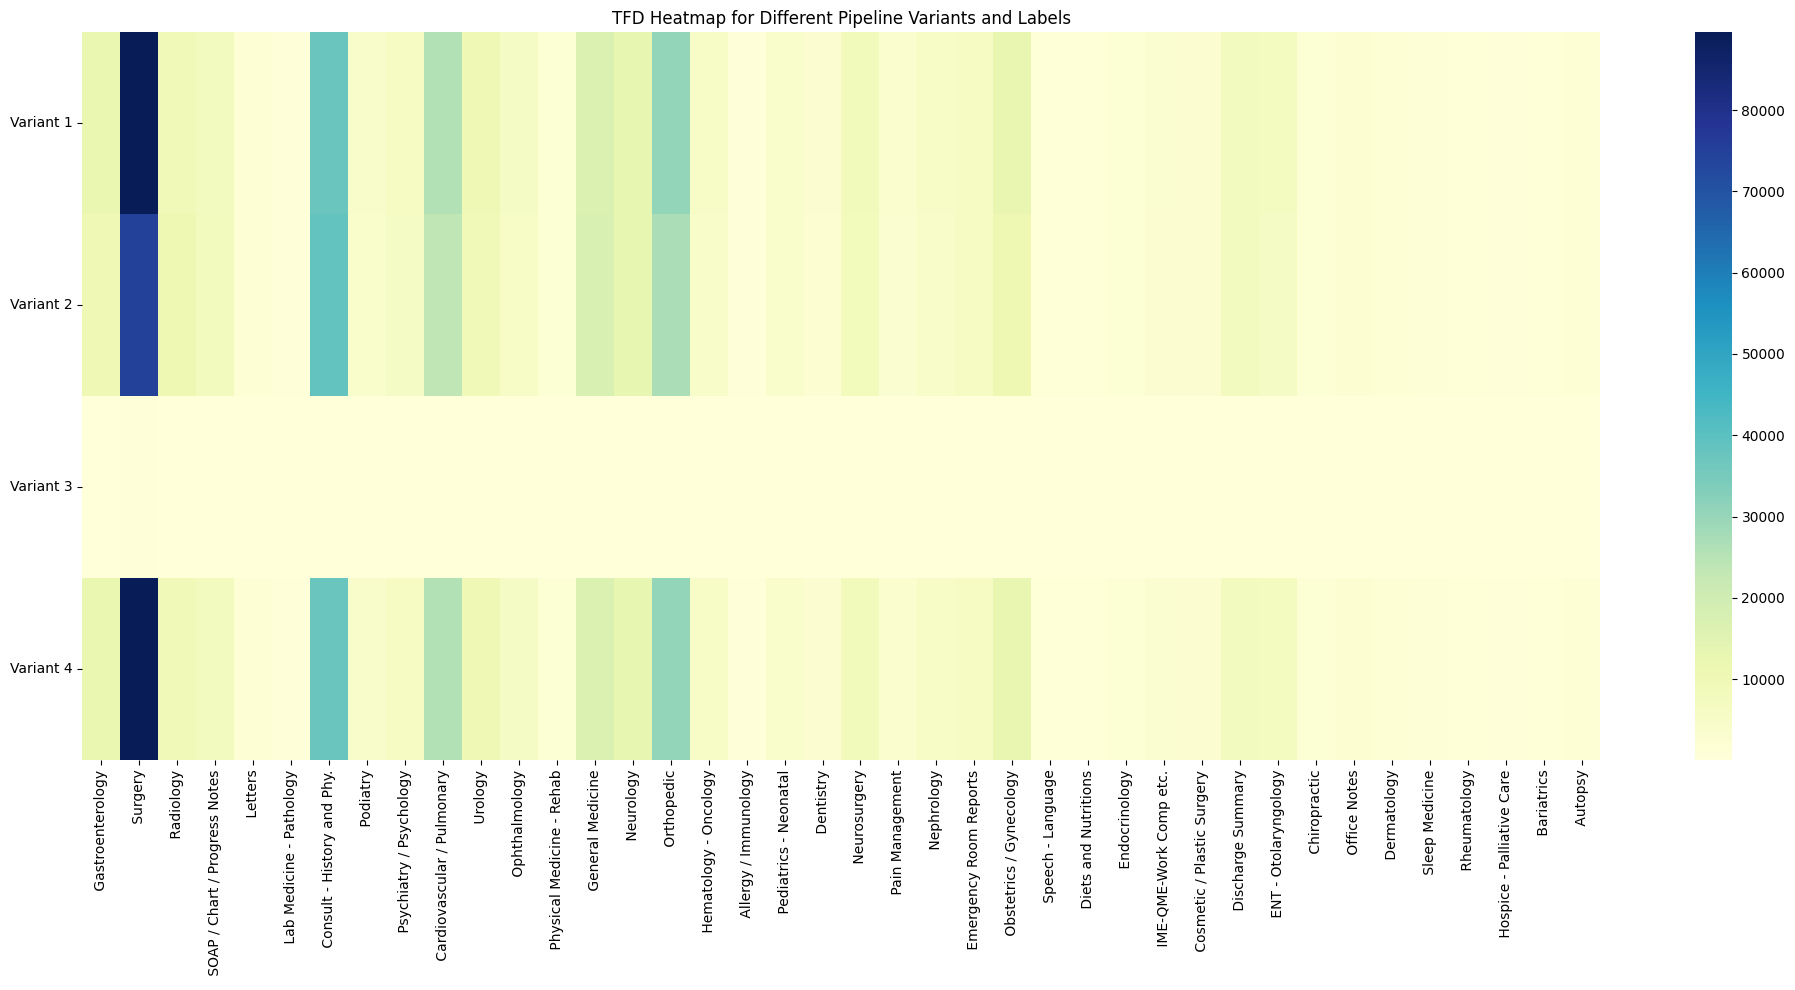

In [163]:
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
import seaborn as sns
import pandas as pd


def compute_document_frequency(texts):
    df = FreqDist()
    for text in texts:
        for term in set(text):  
            df[term] += 1
    return df

def plot_tf_and_df(tf, df, variant_index):
    N = 50
    terms, term_freqs = zip(*tf.most_common(N))
    doc_freqs = [df[term] for term in terms]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # bar plot for Term Frequency
    ax1.bar(terms, term_freqs, color='blue', label='Term Frequency')
    ax1.set_ylabel("Term Frequency", color='blue')
    ax1.tick_params(axis='y', colors='blue')
    
    #  line plot for Document Frequency
    ax2 = ax1.twinx()
    ax2.plot(terms, doc_freqs, color='red', marker='o', label='Document Frequency')
    ax2.set_ylabel("Document Frequency", color='red')
    ax2.tick_params(axis='y', colors='red')
    
    plt.title(f"Using Variant #{variant_index}")
    ax1.set_xticklabels(terms, rotation=90)
    plt.xticks(rotation=70)
    plt.tight_layout()  
    
    plt.show()

def plot_tfd(tf, variant_index):
    N = 50
    terms, freqs = zip(*tf.most_common(N))
    
    plt.figure(figsize=(10, 6))
    plt.bar(terms, freqs, color='blue')
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(f"Term Frequency Distribution for Variant #{variant_index}")
    plt.setp(plt.gca().get_xticklabels(), rotation=90)
    plt.tight_layout()  
    plt.show()

# different variants
pipeline_variants = [
    # TextProcessingPipeline(language='en', tokenizer_type='word', stemmer_type='snowball', use_lemmatization=False, use_special_header=True), # variant 1 - takes too long
    TextProcessingPipeline(language='en', tokenizer_type='word', stemmer_type='snowball', use_lemmatization=True, use_special_header=False), # variant 1
    TextProcessingPipeline(language='en', tokenizer_type='regex', stemmer_type='snowball', use_lemmatization=False, use_special_header=False),  # variant 2
    TextProcessingPipeline(language='en', tokenizer_type='sentence', stemmer_type='snowball', use_lemmatization=False, use_special_header=False), # variant 3
    TextProcessingPipeline(language='en', tokenizer_type='word',use_stemming=False, use_lemmatization=True, use_special_header=False) # variant 4
]

# zeros-filled dataframe to store TFD values for each label and variant
heatmap_data = pd.DataFrame(0, index=[f"Variant {i+1}" for i in range(len(pipeline_variants))], 
                            columns=english_texts['label'].unique())

for index, variant in enumerate(pipeline_variants, 1):
    print(f"Using pipeline variant #{index}")
    
    english_texts['processed_text'] = english_texts['text'].apply(variant.process)
    all_terms = [term for sublist in english_texts['processed_text'] for term in sublist]

    tf_per_class = {}  # Store TFD for each class
    
    tf = FreqDist(all_terms)
    df = compute_document_frequency(english_texts['processed_text'])

    plot_tf_and_df(tf, df, variant_index=index)

    unique_classes = english_texts['label'].unique()
    for class_label in unique_classes:
        class_texts = english_texts[english_texts['label'] == class_label]['processed_text']
        all_terms = [term for sublist in class_texts for term in sublist]
        tf = FreqDist(all_terms)

        N = 50
        _, term_freqs = zip(*tf.most_common(N))
        heatmap_data.at[f"Variant {index}", class_label] = sum(term_freqs)
    
    print("\n" + "-"*50 + "\n")

#  heatmap TFD
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt="d", annot_kws={"size": 10})
plt.title("TFD Heatmap for Different Pipeline Variants and Labels")
plt.xticks(rotation=90)  
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()



### Term Frequency Distribution Analysis using different text processing pipelines 

The heatmap provides insights into the Term Frequency Distributions (TFD) across four distinct pipeline variants when processing various labels

- Variant 1: uses word tokenization, snowball stemming, and lemmatization. This variant seems to capture a comprehensive set of terms, as indicated by its high TFD across most classes.
- Variant 2: uses regex tokenization combined with snowball stemming, but without lemmatization. the absence of lemmatization might result in different inflections of a word being treated separately, potentially dispersing the term frequencies.
- Variant 3: uses sentence tokenization with the inclusion of snowball stemming, but omits lemmatization. Sentence tokenization may yield fewer tokens, focusing more on the holistic understanding of content rather than individual terms.
- Variant 4: Uses word tokenization and lemmatization, but specifically avoids stemming.

Observations
- Gastroenterology, as a label, has a notably high term frequency across all pipeline variants. This suggests that texts under this label might be more verbose or repetitive.
Variant 1 consistently yields higher term frequencies across most labels when compared to other variants, indicating its potential efficacy in capturing relevant terms.

- Other labels, like Dermatology and ENT, display low term frequencies across all variants, which could imply shorter texts or less repetitive terminology in these fields.

For tasks that require extensive term extraction and understanding of textual nuances, Variant 1 seems to be the most effective way whereas 3 is definitevly not ideal. 
Different pipeline - techniques therefore change the outcome! 


### You ca see other examples of changes of text pipline processing (and their term distribution)  below again: 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moritz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moritz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Moritz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


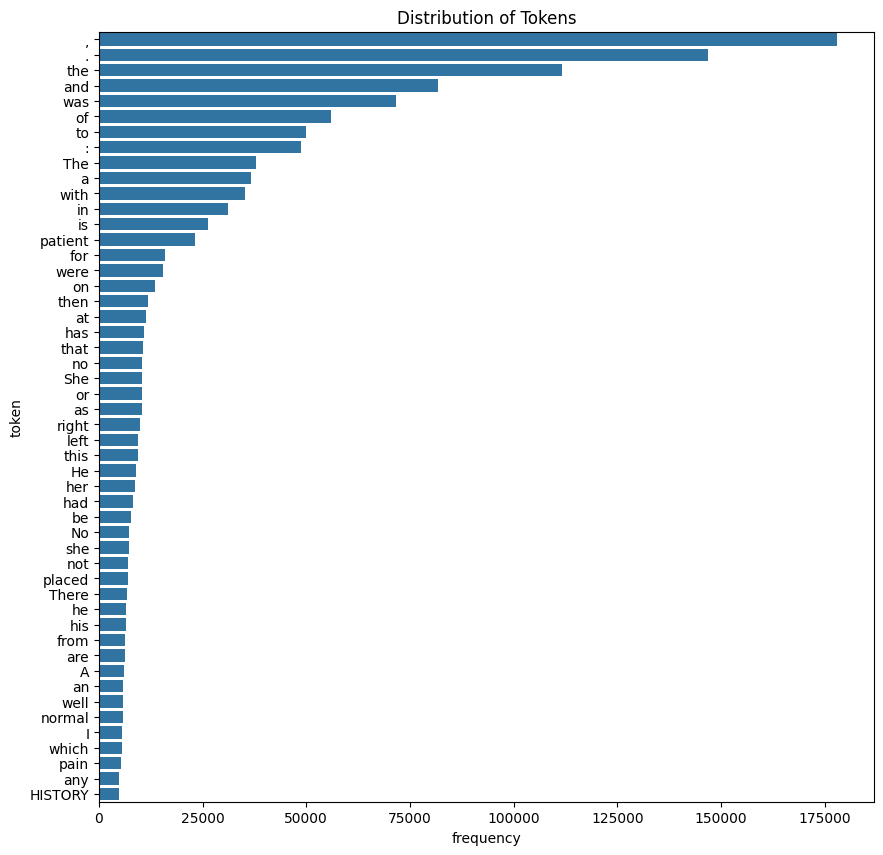

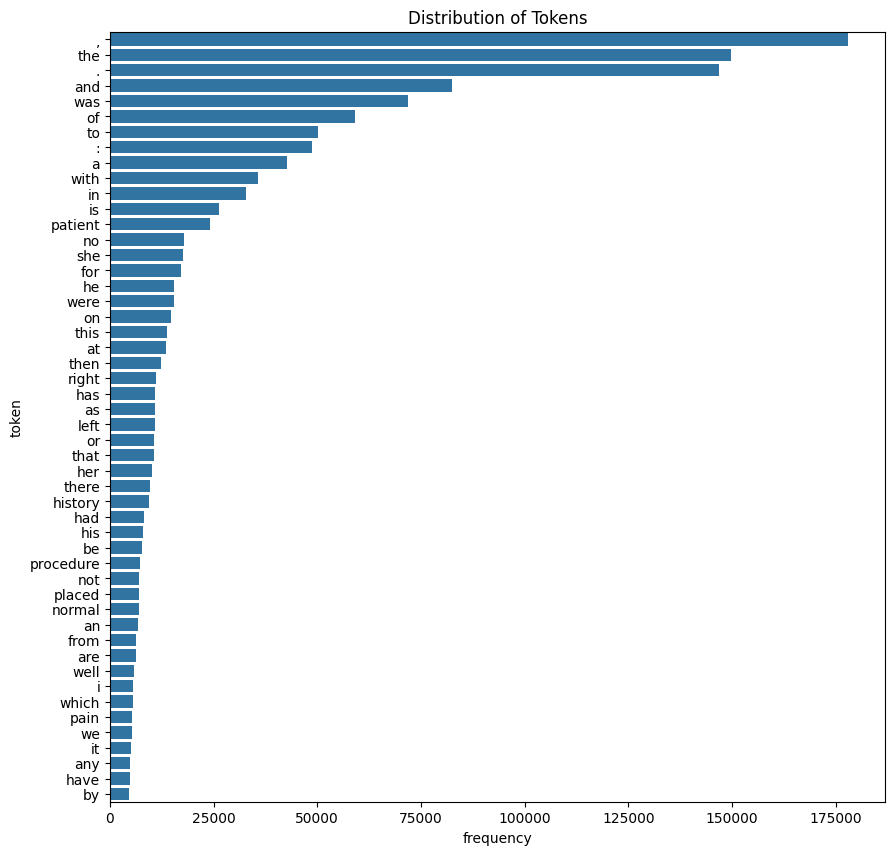

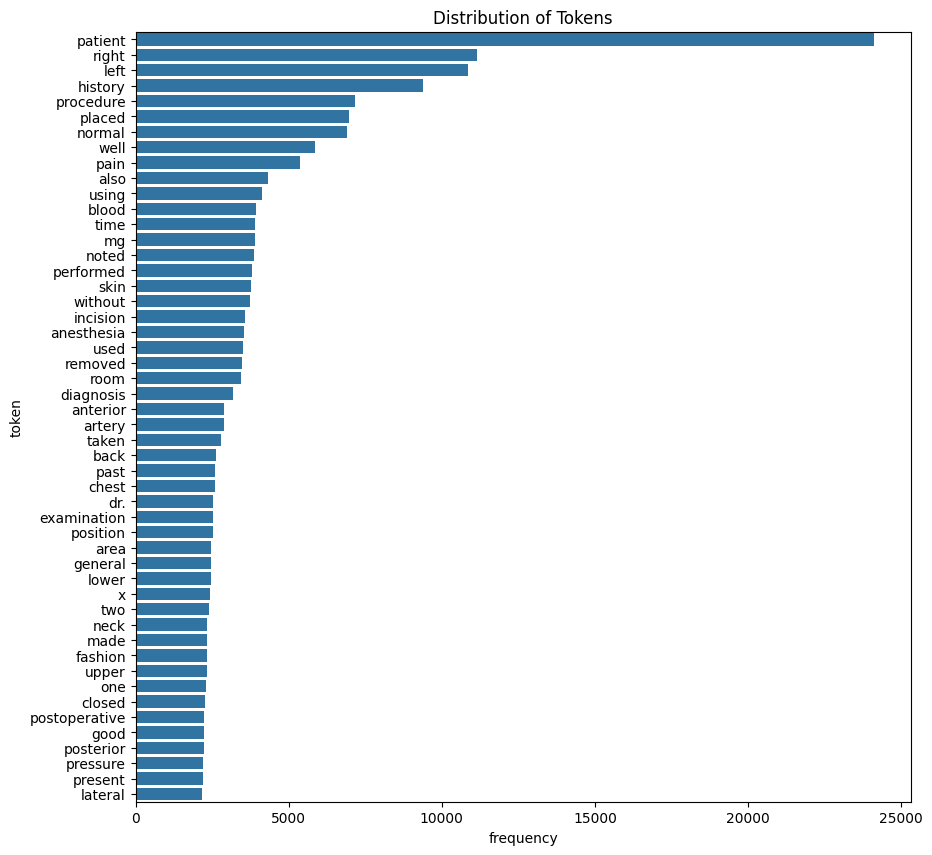

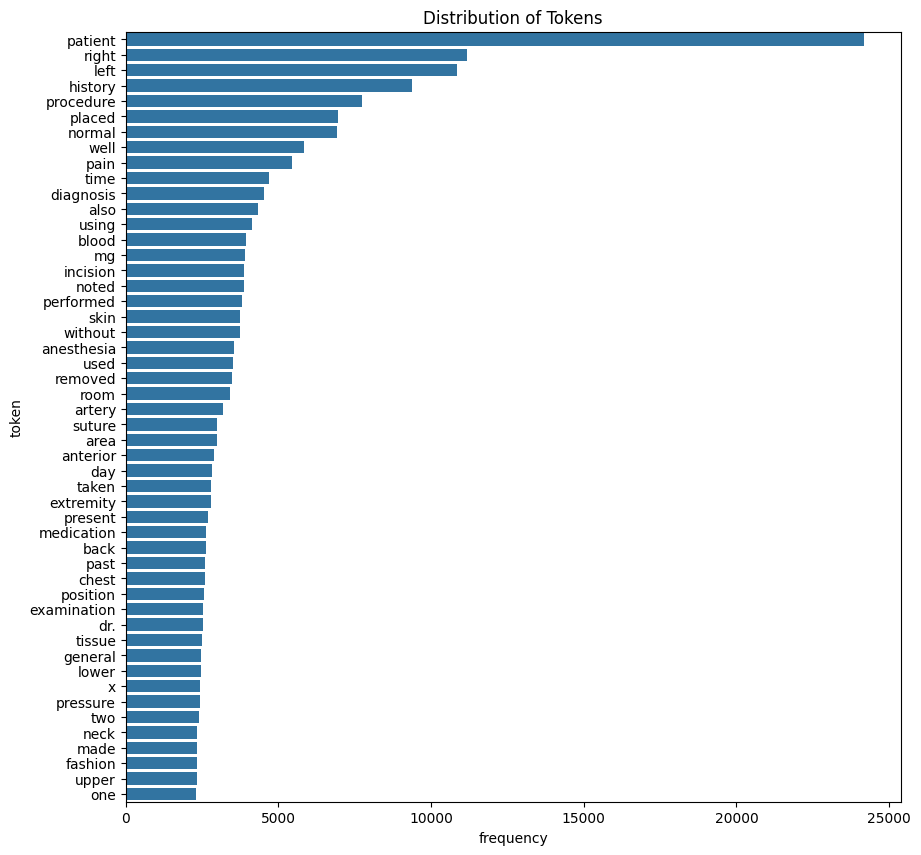

In [164]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


data = load_dataset('argilla/medical-domain')['train']
df = data.to_pandas()

df['label'] = df.prediction.apply(lambda x: x[0]['label'])
df['text_length'] = df.metrics.apply(lambda x: x['text_length'])


label_frequencies = df.label.value_counts()



tokens = df.text.apply(func=word_tokenize).explode()


def plot_token_frequencies(tokens):
	token_frequencies = tokens.value_counts().head(50)
	fig, ax = plt.subplots(1, 1, figsize = (10, 10))
	sns.barplot(
		x=token_frequencies.values,
		y=token_frequencies.index,
		ax=ax
	)
	ax.set_title('Distribution of Tokens')
	ax.set_xlabel('frequency')
	ax.set_ylabel('token')
	plt.show()


plot_token_frequencies(tokens)


filtered_tokens = tokens.str.lower()
plot_token_frequencies(filtered_tokens)


filtered_tokens = filtered_tokens[~filtered_tokens.isin(stopwords.words('english'))]
filtered_tokens = filtered_tokens[filtered_tokens.str.match('[a-z]')]
plot_token_frequencies(filtered_tokens)


lemmatizer = WordNetLemmatizer()
filtered_tokens = filtered_tokens.apply(lambda x: lemmatizer.lemmatize(x))
plot_token_frequencies(filtered_tokens)


